In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv(r'E_commerce_sales.csv')
df.head()

,index,CustomerID,TOTAL_ORDERS,REVENUE,AVERAGE_ORDER_VALUE,CARRIAGE_REVENUE,AVERAGE_SHIPPING,FIRST_ORDER_DATE,LATEST_ORDER_DATE,AVG_DAY_S_BETWEEN_ORDERS,...,SATURDAY_REVENUE,SUNDAY_REVENUE,WEEK1_DAY01_DAY07_ORDERS,WEEK2_DAY08_DAY15_ORDERS,WEEK3_DAY16_DAY23_ORDERS,WEEK4_DAY24_DAY31_ORDERS,WEEK1_DAY01_DAY07_REVENUE,WEEK2_DAY08_DAY15_REVENUE,WEEK3_DAY16_DAY23_REVENUE,WEEK4_DAY24_DAY31_REVENUE
0,0,2354,124,11986.54,96.67,529.59,4.27,12/30/2016,10/24/2021,14.19,...,1496.33,1120.31,28,42,30,24,2685.37,4299.28,2592.18,2409.71
1,1,2361,82,11025.96,134.46,97.92,1.19,3/31/2018,10/24/2021,15.89,...,1624.34,1418.85,18,19,19,26,1336.09,2776.02,2807.66,4106.19
2,2,2415,43,7259.69,168.83,171.69,3.99,11/30/2017,10/24/2021,33.12,...,1223.96,2716.91,9,11,6,17,2299.93,1383.92,713.94,2861.90
3,3,2427,44,6992.27,158.92,92.82,2.11,4/9/2019,10/24/2021,21.11,...,630.00,685.48,12,15,9,8,2317.95,2417.22,997.02,1260.08
4,4,2456,55,6263.44,113.88,179.04,3.26,10/23/2020,10/24/2021,6.65,...,956.56,1832.22,10,18,21,6,831.14,1938.18,2725.66,768.46


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 33 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   index                      5000 non-null   int64  
 1   CustomerID                 5000 non-null   int64  
 2   TOTAL_ORDERS               5000 non-null   int64  
 3   REVENUE                    5000 non-null   float64
 4   AVERAGE_ORDER_VALUE        5000 non-null   float64
 5   CARRIAGE_REVENUE           5000 non-null   float64
 6   AVERAGE_SHIPPING           5000 non-null   float64
 7   FIRST_ORDER_DATE           5000 non-null   object 
 8   LATEST_ORDER_DATE          5000 non-null   object 
 9   AVG_DAY_S_BETWEEN_ORDERS   5000 non-null   float64
 10  DAYS_SINCE_LASTORDER       5000 non-null   int64  
 11  MONDAY_ORDERS              5000 non-null   int64  
 12  TUESDAY_ORDERS             5000 non-null   int64  
 13  WEDNESDAY_ORDERS           5000 non-null   int64

In [4]:
df.isnull().sum()

index                        0
CustomerID                   0
TOTAL_ORDERS                 0
REVENUE                      0
AVERAGE_ORDER_VALUE          0
CARRIAGE_REVENUE             0
AVERAGE_SHIPPING             0
FIRST_ORDER_DATE             0
LATEST_ORDER_DATE            0
AVG_DAY_S_BETWEEN_ORDERS     0
DAYS_SINCE_LASTORDER         0
MONDAY_ORDERS                0
TUESDAY_ORDERS               0
WEDNESDAY_ORDERS             0
THURSDAY_ORDERS              0
FRIDAY_ORDERS                0
SATURDAY_ORDERS              0
SUNDAY_ORDERS                0
MONDAY_REVENUE               0
TUESDAY_REVENUE              0
WEDNESDAY_REVENUE            0
THURSDAY_REVENUE             0
FRIDAY_REVENUE               0
SATURDAY_REVENUE             0
SUNDAY_REVENUE               0
WEEK1_DAY01_DAY07_ORDERS     0
WEEK2_DAY08_DAY15_ORDERS     0
WEEK3_DAY16_DAY23_ORDERS     0
WEEK4_DAY24_DAY31_ORDERS     0
WEEK1_DAY01_DAY07_REVENUE    0
WEEK2_DAY08_DAY15_REVENUE    0
WEEK3_DAY16_DAY23_REVENUE    0
WEEK4_DA

In [5]:
df.describe()

,index,CustomerID,TOTAL_ORDERS,REVENUE,AVERAGE_ORDER_VALUE,CARRIAGE_REVENUE,AVERAGE_SHIPPING,AVG_DAY_S_BETWEEN_ORDERS,DAYS_SINCE_LASTORDER,MONDAY_ORDERS,...,SATURDAY_REVENUE,SUNDAY_REVENUE,WEEK1_DAY01_DAY07_ORDERS,WEEK2_DAY08_DAY15_ORDERS,WEEK3_DAY16_DAY23_ORDERS,WEEK4_DAY24_DAY31_ORDERS,WEEK1_DAY01_DAY07_REVENUE,WEEK2_DAY08_DAY15_REVENUE,WEEK3_DAY16_DAY23_REVENUE,WEEK4_DAY24_DAY31_REVENUE
count,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,...,5000.00000,5000.000000,5000.00000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,2499.500000,43041.227800,12.87040,1681.523840,136.537378,46.036376,3.592574,163.159618,87.420000,1.629000,...,219.64210,260.943330,2.99780,3.062600,3.230000,3.580000,378.638346,406.595734,421.826908,474.462852
std,1443.520003,49949.848017,12.67988,1998.618678,91.651569,47.879226,2.021360,259.699496,80.156513,2.236506,...,376.13976,406.926075,3.25698,3.792461,3.921043,3.970384,515.590218,619.413277,643.449120,617.579321
min,0.000000,2333.000000,1.00000,38.500000,10.680000,0.000000,0.000000,0.000000,1.000000,0.000000,...,0.00000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1249.750000,4019.500000,3.00000,315.097500,83.025000,9.980000,2.500000,21.670000,7.000000,0.000000,...,0.00000,0.000000,1.00000,0.000000,0.000000,1.000000,63.990000,0.000000,0.000000,80.000000
50%,2499.500000,16097.000000,8.00000,966.725000,113.160000,24.985000,3.660000,57.635000,68.000000,1.000000,...,62.41500,135.990000,2.00000,2.000000,2.000000,2.000000,190.985000,183.925000,194.990000,264.485000
75%,3749.250000,74223.500000,20.00000,2493.072500,160.272500,76.862500,4.790000,170.357500,171.250000,2.000000,...,297.28000,341.367500,4.00000,5.000000,5.000000,5.000000,513.012500,553.462500,604.085000,651.487500
max,4999.000000,279492.000000,156.00000,34847.400000,1578.880000,529.590000,35.990000,1409.500000,207.000000,19.000000,...,4642.97000,8366.350000,32.00000,42.000000,37.000000,53.000000,8143.650000,11303.890000,12946.220000,8274.970000


In [6]:
df2 = df.drop(['index','CustomerID'], axis=1)
df2.head()

,TOTAL_ORDERS,REVENUE,AVERAGE_ORDER_VALUE,CARRIAGE_REVENUE,AVERAGE_SHIPPING,FIRST_ORDER_DATE,LATEST_ORDER_DATE,AVG_DAY_S_BETWEEN_ORDERS,DAYS_SINCE_LASTORDER,MONDAY_ORDERS,...,SATURDAY_REVENUE,SUNDAY_REVENUE,WEEK1_DAY01_DAY07_ORDERS,WEEK2_DAY08_DAY15_ORDERS,WEEK3_DAY16_DAY23_ORDERS,WEEK4_DAY24_DAY31_ORDERS,WEEK1_DAY01_DAY07_REVENUE,WEEK2_DAY08_DAY15_REVENUE,WEEK3_DAY16_DAY23_REVENUE,WEEK4_DAY24_DAY31_REVENUE
0,124,11986.54,96.67,529.59,4.27,12/30/2016,10/24/2021,14.19,1,13,...,1496.33,1120.31,28,42,30,24,2685.37,4299.28,2592.18,2409.71
1,82,11025.96,134.46,97.92,1.19,3/31/2018,10/24/2021,15.89,1,11,...,1624.34,1418.85,18,19,19,26,1336.09,2776.02,2807.66,4106.19
2,43,7259.69,168.83,171.69,3.99,11/30/2017,10/24/2021,33.12,1,5,...,1223.96,2716.91,9,11,6,17,2299.93,1383.92,713.94,2861.90
3,44,6992.27,158.92,92.82,2.11,4/9/2019,10/24/2021,21.11,1,10,...,630.00,685.48,12,15,9,8,2317.95,2417.22,997.02,1260.08
4,55,6263.44,113.88,179.04,3.26,10/23/2020,10/24/2021,6.65,1,2,...,956.56,1832.22,10,18,21,6,831.14,1938.18,2725.66,768.46


In [7]:
num_col=[]
cat_col=[]
for i in df2.columns:
    if df2[i].dtype == 'int64' or df2[i].dtype == 'float64':
        num_col.append(i)
    else:
        cat_col.append(i)

In [8]:
print(num_col)
print('**********************')
print(cat_col)

['TOTAL_ORDERS', 'REVENUE', 'AVERAGE_ORDER_VALUE', 'CARRIAGE_REVENUE', 'AVERAGE_SHIPPING', 'AVG_DAY_S_BETWEEN_ORDERS', 'DAYS_SINCE_LASTORDER', 'MONDAY_ORDERS', 'TUESDAY_ORDERS', 'WEDNESDAY_ORDERS', 'THURSDAY_ORDERS', 'FRIDAY_ORDERS', 'SATURDAY_ORDERS', 'SUNDAY_ORDERS', 'MONDAY_REVENUE', 'TUESDAY_REVENUE', 'WEDNESDAY_REVENUE', 'THURSDAY_REVENUE', 'FRIDAY_REVENUE', 'SATURDAY_REVENUE', 'SUNDAY_REVENUE', 'WEEK1_DAY01_DAY07_ORDERS', 'WEEK2_DAY08_DAY15_ORDERS', 'WEEK3_DAY16_DAY23_ORDERS', 'WEEK4_DAY24_DAY31_ORDERS', 'WEEK1_DAY01_DAY07_REVENUE', 'WEEK2_DAY08_DAY15_REVENUE', 'WEEK3_DAY16_DAY23_REVENUE', 'WEEK4_DAY24_DAY31_REVENUE']
**********************
['FIRST_ORDER_DATE', 'LATEST_ORDER_DATE']


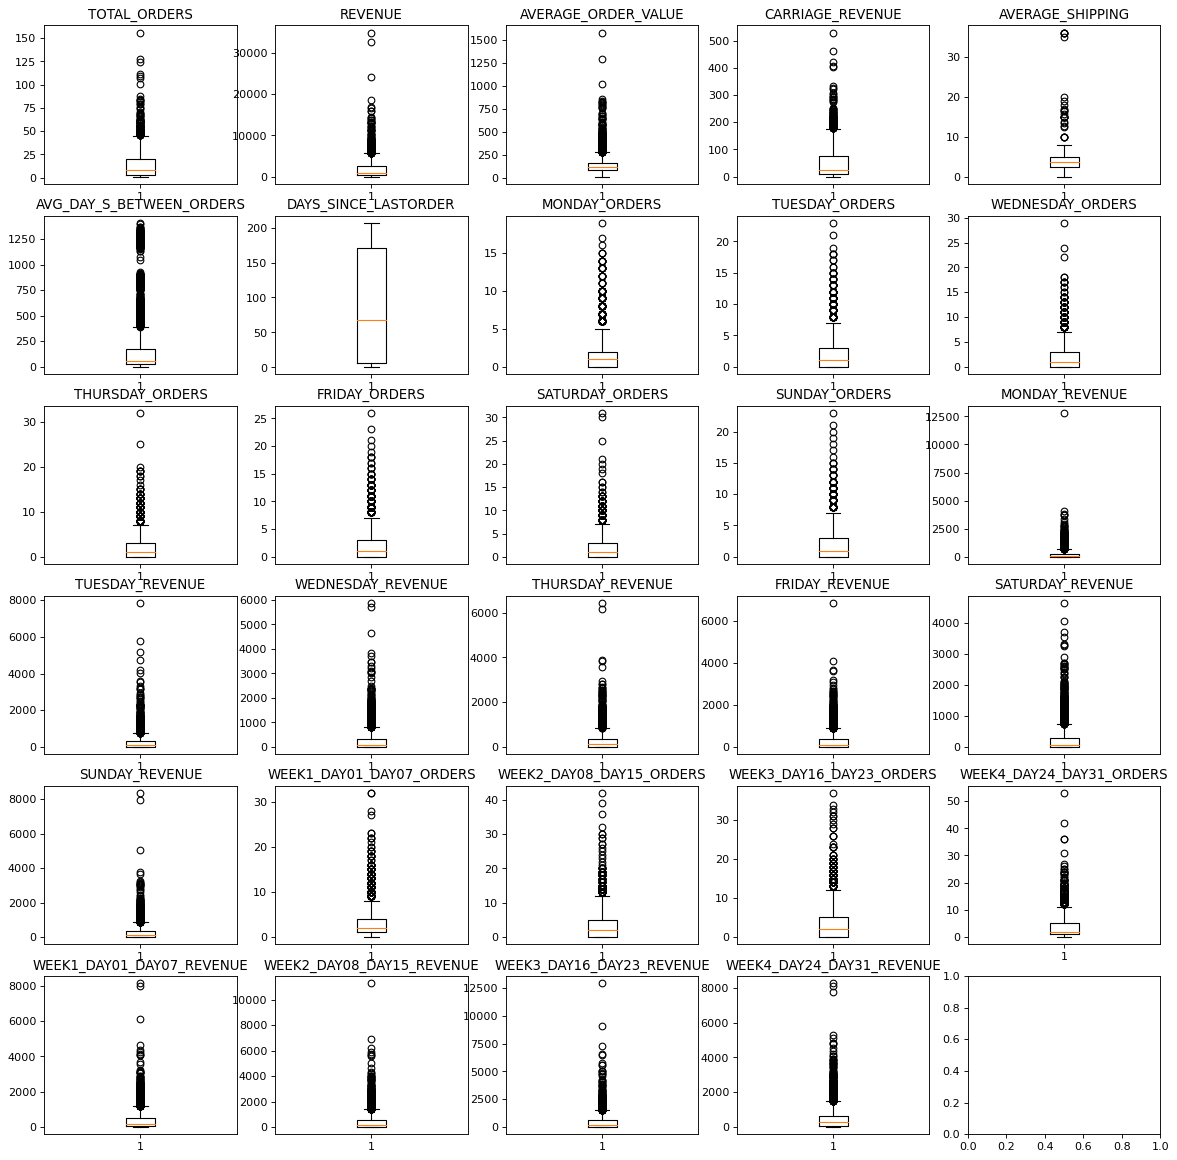

In [9]:
f,ax = plt.subplots(6,5, figsize=(18,18), dpi=80)
index=0
try:
    for i in range(6):
        for j in range(5):
            ax[i,j].boxplot(df2[num_col[index]])
            ax[i,j].set_title(num_col[index])
            index+=1
except:
    pass
plt.show()

<Axes: >

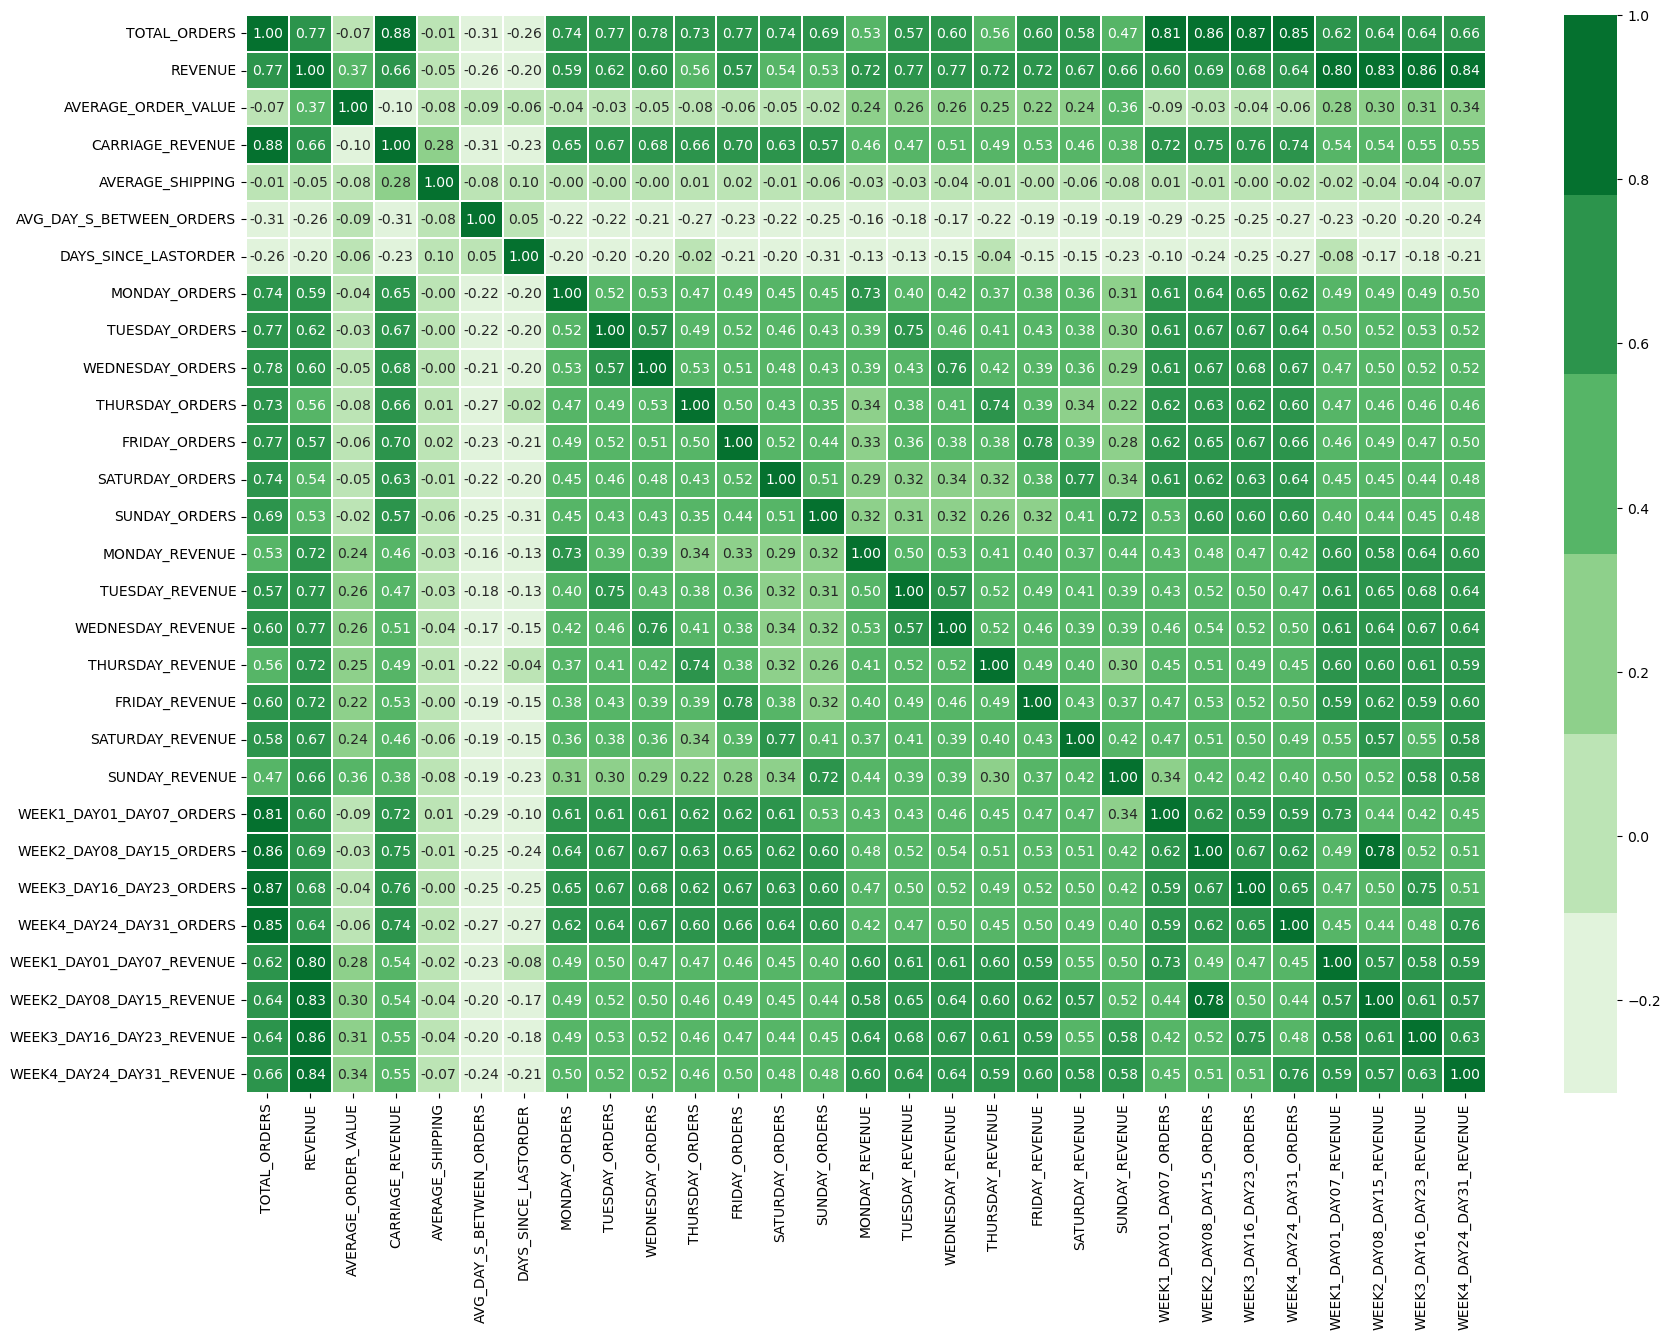

In [10]:
color = sns.color_palette('Greens')
plt.figure(figsize=(20,14))
sns.heatmap(df2.corr(), cmap=color, cbar=True, annot=True, fmt='.2f', linewidths=.3)

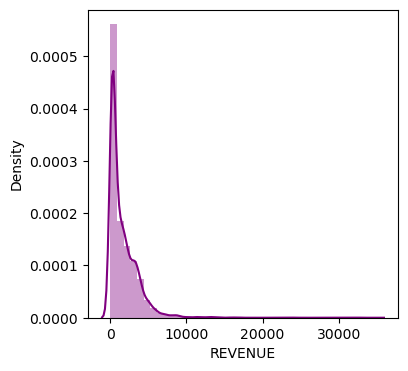

In [11]:
plt.figure(figsize=(4,4))
plot = sns.distplot(df2["REVENUE"], color='purple', bins=40)
plt.show()

In [12]:
df2[num_col].head()

,TOTAL_ORDERS,REVENUE,AVERAGE_ORDER_VALUE,CARRIAGE_REVENUE,AVERAGE_SHIPPING,AVG_DAY_S_BETWEEN_ORDERS,DAYS_SINCE_LASTORDER,MONDAY_ORDERS,TUESDAY_ORDERS,WEDNESDAY_ORDERS,...,SATURDAY_REVENUE,SUNDAY_REVENUE,WEEK1_DAY01_DAY07_ORDERS,WEEK2_DAY08_DAY15_ORDERS,WEEK3_DAY16_DAY23_ORDERS,WEEK4_DAY24_DAY31_ORDERS,WEEK1_DAY01_DAY07_REVENUE,WEEK2_DAY08_DAY15_REVENUE,WEEK3_DAY16_DAY23_REVENUE,WEEK4_DAY24_DAY31_REVENUE
0,124,11986.54,96.67,529.59,4.27,14.19,1,13,13,29,...,1496.33,1120.31,28,42,30,24,2685.37,4299.28,2592.18,2409.71
1,82,11025.96,134.46,97.92,1.19,15.89,1,11,13,10,...,1624.34,1418.85,18,19,19,26,1336.09,2776.02,2807.66,4106.19
2,43,7259.69,168.83,171.69,3.99,33.12,1,5,4,3,...,1223.96,2716.91,9,11,6,17,2299.93,1383.92,713.94,2861.90
3,44,6992.27,158.92,92.82,2.11,21.11,1,10,8,5,...,630.00,685.48,12,15,9,8,2317.95,2417.22,997.02,1260.08
4,55,6263.44,113.88,179.04,3.26,6.65,1,2,3,8,...,956.56,1832.22,10,18,21,6,831.14,1938.18,2725.66,768.46


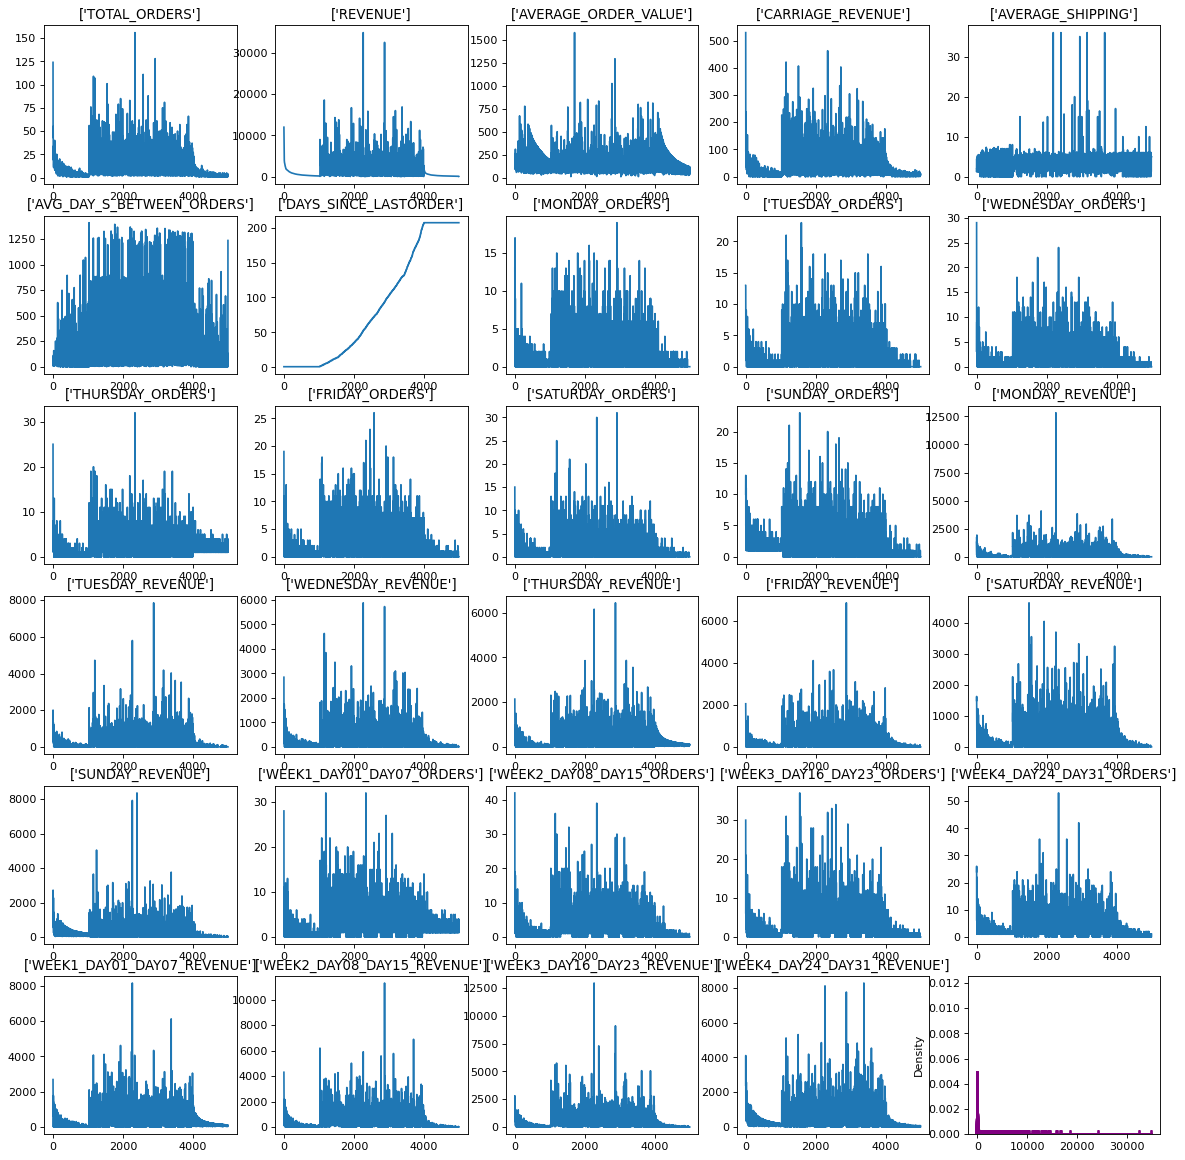

In [13]:
f,ax = plt.subplots(6,5, figsize=(18,18), dpi=80)
index_1=0
try:
    for i in range(6):
        for j in range(5):
            plot = sns.distplot(df2[num_col], color='purple', rug=True, hist=False, kde=True)
            ax[i,j].plot(df2[num_col[index_1]])
            ax[i,j].set_title([num_col[index_1]])
            index_1+=1
except:
    pass
plt.show()

In [14]:
df2.head()

,TOTAL_ORDERS,REVENUE,AVERAGE_ORDER_VALUE,CARRIAGE_REVENUE,AVERAGE_SHIPPING,FIRST_ORDER_DATE,LATEST_ORDER_DATE,AVG_DAY_S_BETWEEN_ORDERS,DAYS_SINCE_LASTORDER,MONDAY_ORDERS,...,SATURDAY_REVENUE,SUNDAY_REVENUE,WEEK1_DAY01_DAY07_ORDERS,WEEK2_DAY08_DAY15_ORDERS,WEEK3_DAY16_DAY23_ORDERS,WEEK4_DAY24_DAY31_ORDERS,WEEK1_DAY01_DAY07_REVENUE,WEEK2_DAY08_DAY15_REVENUE,WEEK3_DAY16_DAY23_REVENUE,WEEK4_DAY24_DAY31_REVENUE
0,124,11986.54,96.67,529.59,4.27,12/30/2016,10/24/2021,14.19,1,13,...,1496.33,1120.31,28,42,30,24,2685.37,4299.28,2592.18,2409.71
1,82,11025.96,134.46,97.92,1.19,3/31/2018,10/24/2021,15.89,1,11,...,1624.34,1418.85,18,19,19,26,1336.09,2776.02,2807.66,4106.19
2,43,7259.69,168.83,171.69,3.99,11/30/2017,10/24/2021,33.12,1,5,...,1223.96,2716.91,9,11,6,17,2299.93,1383.92,713.94,2861.90
3,44,6992.27,158.92,92.82,2.11,4/9/2019,10/24/2021,21.11,1,10,...,630.00,685.48,12,15,9,8,2317.95,2417.22,997.02,1260.08
4,55,6263.44,113.88,179.04,3.26,10/23/2020,10/24/2021,6.65,1,2,...,956.56,1832.22,10,18,21,6,831.14,1938.18,2725.66,768.46


In [15]:
df[["DAYS_SINCE_LASTORDER","CustomerID","REVENUE"]].groupby(["DAYS_SINCE_LASTORDER","CustomerID"]).agg([min,max])

REVENUE          
                                      min       max
DAYS_SINCE_LASTORDER CustomerID                    
1                    2354        11986.54  11986.54
                     2361        11025.96  11025.96
                     2415         7259.69   7259.69
                     2427         6992.27   6992.27
                     2456         6263.44   6263.44
...                                   ...       ...
207                  176278        117.49    117.49
                     176319        117.49    117.49
                     176336        117.49    117.49
                     176370        117.49    117.49
                     203115         94.14     94.14

[5000 rows x 2 columns]

In [16]:
df[["TOTAL_ORDERS","CustomerID","REVENUE"]].groupby(["TOTAL_ORDERS","CustomerID"]).agg([min,max])

REVENUE          
                              min       max
TOTAL_ORDERS CustomerID                    
1            22719         776.99    776.99
             26167         708.39    708.39
             29899         645.99    645.99
             34722         581.50    581.50
             35429         573.05    573.05
...                           ...       ...
109          2420         7148.66   7148.66
111          2379         8821.84   8821.84
124          2354        11986.54  11986.54
128          2360        11127.82  11127.82
156          2358        11349.58  11349.58

[5000 rows x 2 columns]

In [17]:
df[["FIRST_ORDER_DATE","LATEST_ORDER_DATE","TOTAL_ORDERS"]].groupby(["FIRST_ORDER_DATE","LATEST_ORDER_DATE"]).agg('sum')

TOTAL_ORDERS
FIRST_ORDER_DATE LATEST_ORDER_DATE              
1/1/2015         10/15/2021                    8
                 5/4/2021                      6
                 7/17/2021                     8
                 9/10/2021                     6
1/1/2018         10/24/2021                   17
...                                          ...
9/9/2018         10/24/2021                    6
9/9/2019         10/24/2021                   11
                 8/30/2021                    12
9/9/2020         4/1/2021                      6
                 9/18/2021                    40

[3981 rows x 1 columns]

In [18]:
df[["CustomerID","LATEST_ORDER_DATE","WEEK1_DAY01_DAY07_ORDERS"]].groupby(["CustomerID","LATEST_ORDER_DATE"]).agg('sum')

,,WEEK1_DAY01_DAY07_ORDERS
CustomerID,LATEST_ORDER_DATE,
2333,9/2/2021,13
2334,7/23/2021,7
2335,9/2/2021,9
2336,10/20/2021,19
2337,6/17/2021,6
...,...,...
251041,9/1/2021,2
251042,6/28/2021,0
261374,6/19/2021,1


In [19]:
df[["CustomerID","LATEST_ORDER_DATE","WEEK2_DAY08_DAY15_ORDERS"]].groupby(["CustomerID","LATEST_ORDER_DATE"]).agg('sum')

,,WEEK2_DAY08_DAY15_ORDERS
CustomerID,LATEST_ORDER_DATE,
2333,9/2/2021,15
2334,7/23/2021,29
2335,9/2/2021,17
2336,10/20/2021,18
2337,6/17/2021,1
...,...,...
251041,9/1/2021,0
251042,6/28/2021,1
261374,6/19/2021,0


In [20]:
df[["CustomerID","LATEST_ORDER_DATE","WEEK4_DAY24_DAY31_ORDERS"]].groupby(["CustomerID","LATEST_ORDER_DATE"]).agg('sum')

,,WEEK4_DAY24_DAY31_ORDERS
CustomerID,LATEST_ORDER_DATE,
2333,9/2/2021,14
2334,7/23/2021,10
2335,9/2/2021,13
2336,10/20/2021,24
2337,6/17/2021,12
...,...,...
251041,9/1/2021,0
251042,6/28/2021,1
261374,6/19/2021,0


In [21]:
df[["CustomerID","LATEST_ORDER_DATE","WEEK1_DAY01_DAY07_REVENUE"]].groupby(["CustomerID","LATEST_ORDER_DATE"]).agg('sum')

,,WEEK1_DAY01_DAY07_REVENUE
CustomerID,LATEST_ORDER_DATE,
2333,9/2/2021,8143.65
2334,7/23/2021,4332.96
2335,9/2/2021,7964.00
2336,10/20/2021,4070.74
2337,6/17/2021,6113.97
...,...,...
251041,9/1/2021,59.95
251042,6/28/2021,0.00
261374,6/19/2021,4.95


In [22]:
df[["CustomerID","LATEST_ORDER_DATE","WEEK4_DAY24_DAY31_REVENUE"]].groupby(["CustomerID","LATEST_ORDER_DATE"]).agg('sum')

,,WEEK4_DAY24_DAY31_REVENUE
CustomerID,LATEST_ORDER_DATE,
2333,9/2/2021,8109.45
2334,7/23/2021,7755.92
2335,9/2/2021,3879.00
2336,10/20/2021,5117.11
2337,6/17/2021,8274.97
...,...,...
251041,9/1/2021,0.00
251042,6/28/2021,54.99
261374,6/19/2021,0.00


In [23]:
from scipy.stats import skew

TOTAL_ORDERS
2.2051032699965187


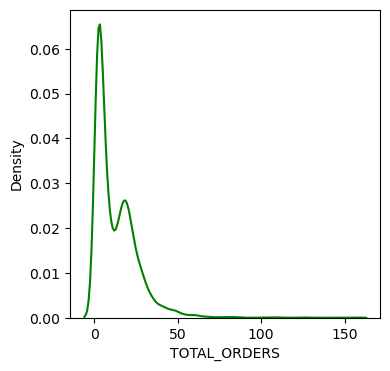

REVENUE
3.9046028374548234


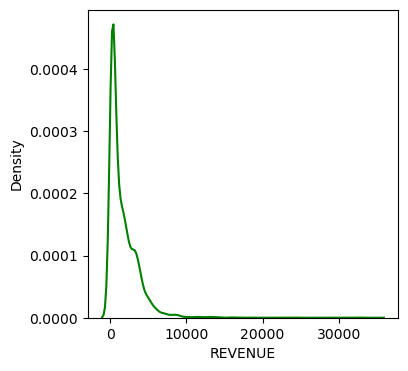

AVERAGE_ORDER_VALUE
3.74512912273759


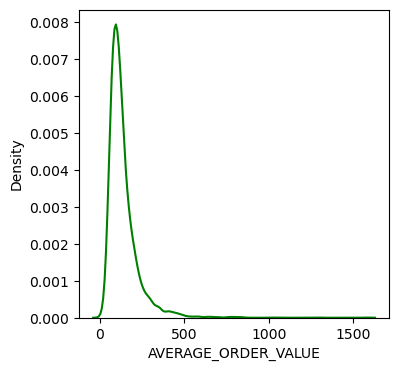

CARRIAGE_REVENUE
1.9355209885623073


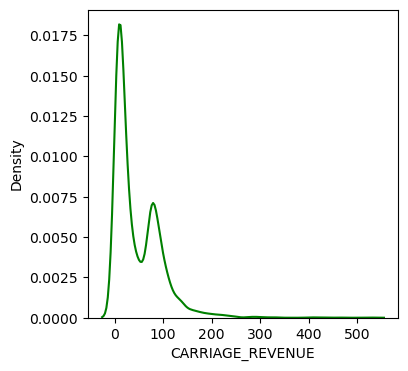

AVERAGE_SHIPPING
4.641736460021793


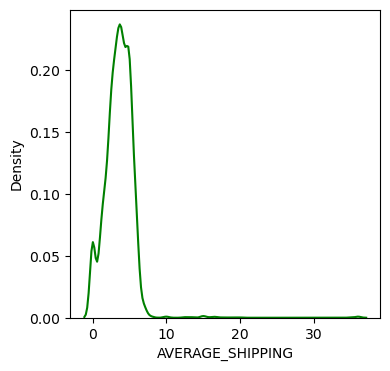

AVG_DAY_S_BETWEEN_ORDERS
2.596609768264403


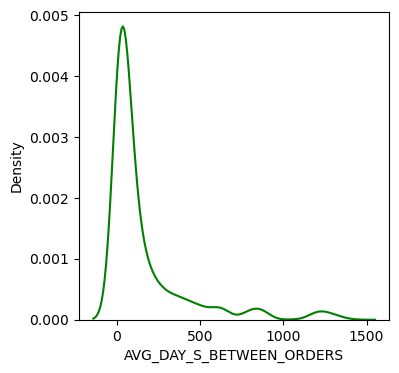

DAYS_SINCE_LASTORDER
0.38988590321021616


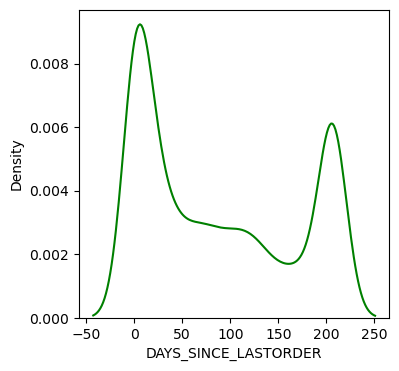

MONDAY_ORDERS
2.1512415936725717


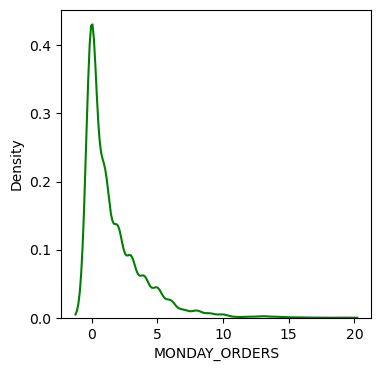

TUESDAY_ORDERS
2.289139502595327


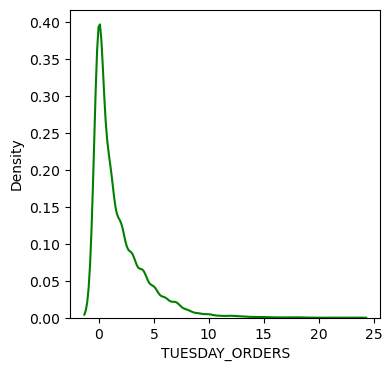

WEDNESDAY_ORDERS
2.4216288654566527


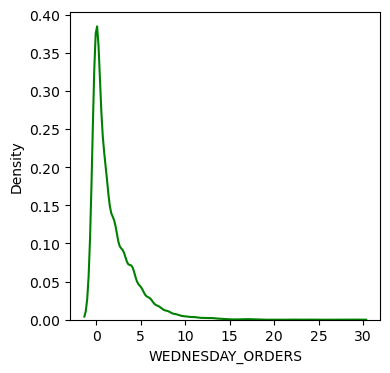

THURSDAY_ORDERS
2.48107978112729


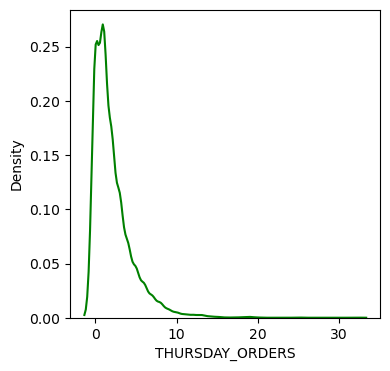

FRIDAY_ORDERS
2.2068509973392008


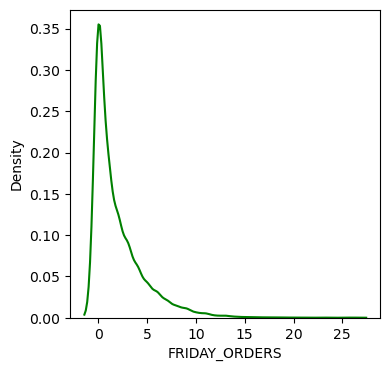

SATURDAY_ORDERS
2.7469998107027154


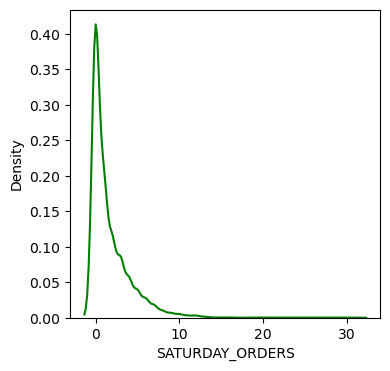

SUNDAY_ORDERS
2.1798131545951467


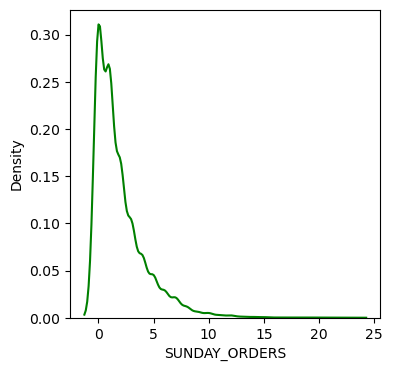

MONDAY_REVENUE
8.800525920436861


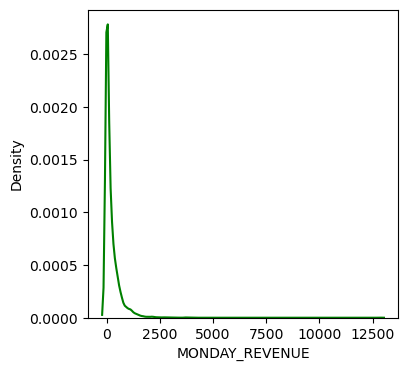

TUESDAY_REVENUE
4.863621727482927


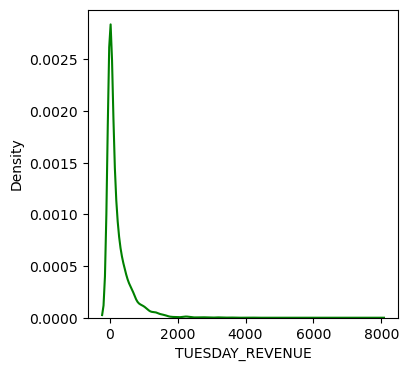

WEDNESDAY_REVENUE
4.000386505627278


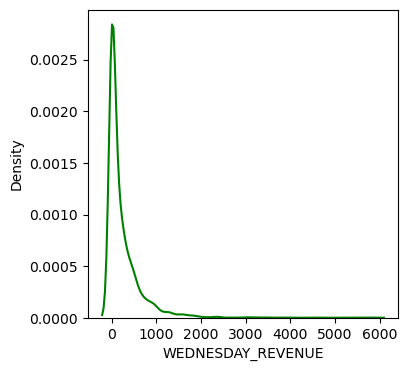

THURSDAY_REVENUE
4.039687401539716


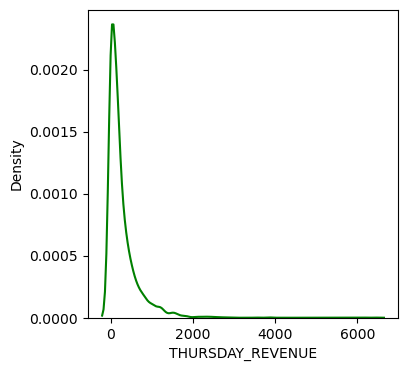

FRIDAY_REVENUE
3.5126982419053956


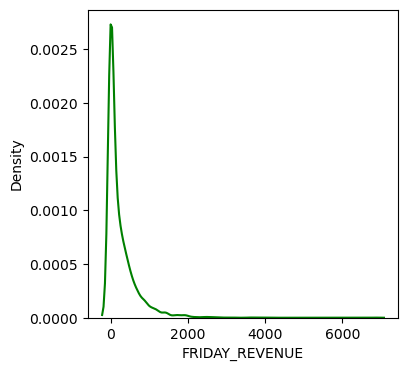

SATURDAY_REVENUE
3.4282837598711766


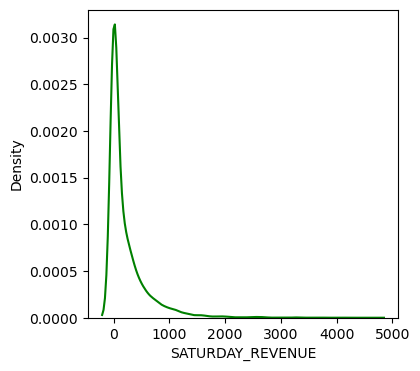

SUNDAY_REVENUE
5.491182108658648


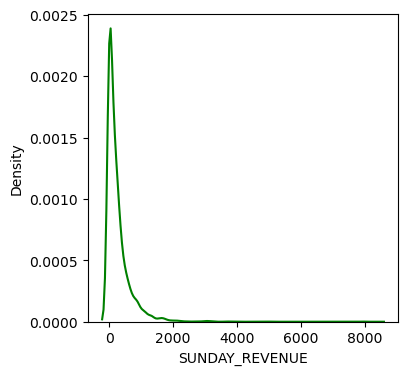

WEEK1_DAY01_DAY07_ORDERS
2.0673604009882074


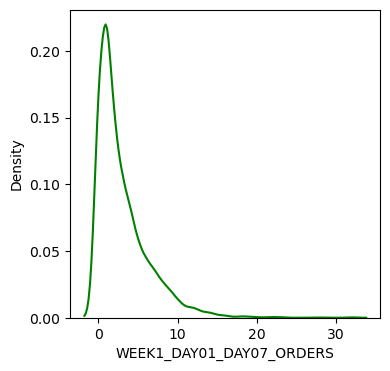

WEEK2_DAY08_DAY15_ORDERS
2.3288567440612447


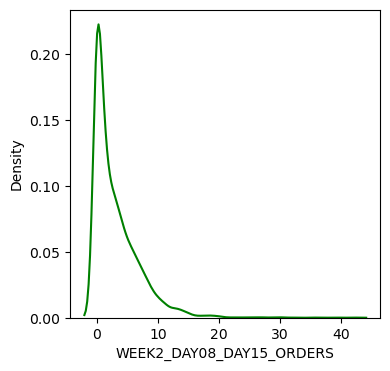

WEEK3_DAY16_DAY23_ORDERS
2.1064101050331536


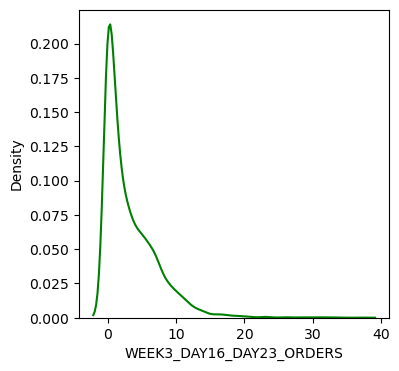

WEEK4_DAY24_DAY31_ORDERS
2.364773473717032


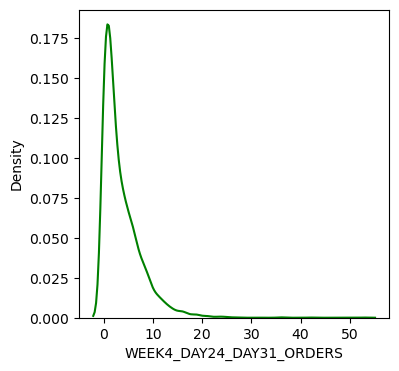

WEEK1_DAY01_DAY07_REVENUE
3.740924440456884


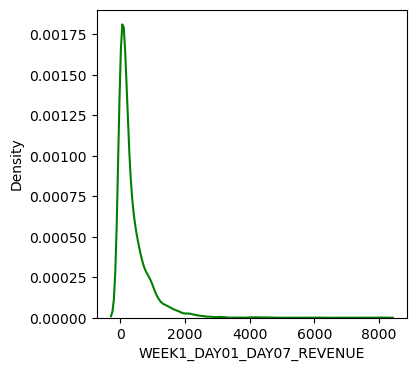

WEEK2_DAY08_DAY15_REVENUE
3.9281370366760675


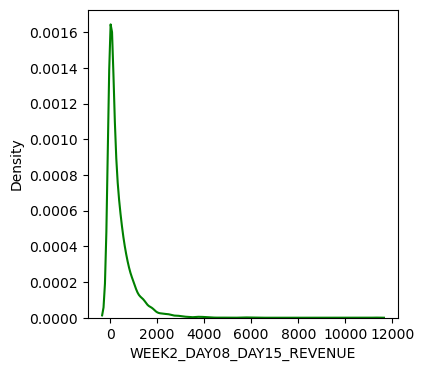

WEEK3_DAY16_DAY23_REVENUE
4.672148400962294


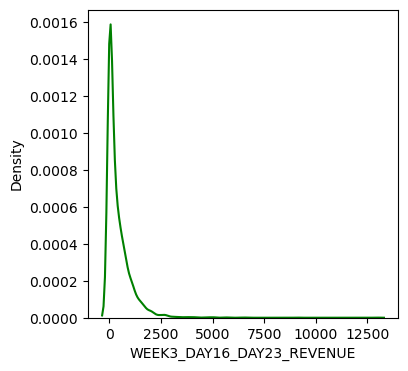

WEEK4_DAY24_DAY31_REVENUE
3.2695938886399722


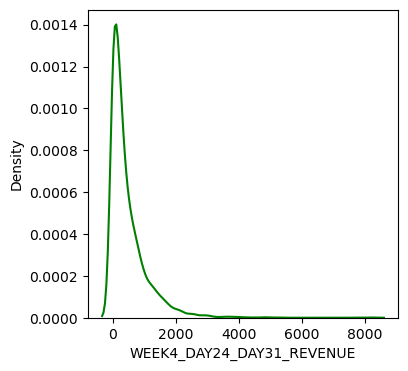

In [24]:
df1 = df.drop(["FIRST_ORDER_DATE","LATEST_ORDER_DATE","index","CustomerID"],axis=1)
for i in df1:
    print(i)
    print(skew(df1[i]))
    plt.figure(figsize=(4,4))
    sns.distplot(df1[i], color='green',hist=False, kde=True)
    plt.show()

In [25]:
df1.head()

,TOTAL_ORDERS,REVENUE,AVERAGE_ORDER_VALUE,CARRIAGE_REVENUE,AVERAGE_SHIPPING,AVG_DAY_S_BETWEEN_ORDERS,DAYS_SINCE_LASTORDER,MONDAY_ORDERS,TUESDAY_ORDERS,WEDNESDAY_ORDERS,...,SATURDAY_REVENUE,SUNDAY_REVENUE,WEEK1_DAY01_DAY07_ORDERS,WEEK2_DAY08_DAY15_ORDERS,WEEK3_DAY16_DAY23_ORDERS,WEEK4_DAY24_DAY31_ORDERS,WEEK1_DAY01_DAY07_REVENUE,WEEK2_DAY08_DAY15_REVENUE,WEEK3_DAY16_DAY23_REVENUE,WEEK4_DAY24_DAY31_REVENUE
0,124,11986.54,96.67,529.59,4.27,14.19,1,13,13,29,...,1496.33,1120.31,28,42,30,24,2685.37,4299.28,2592.18,2409.71
1,82,11025.96,134.46,97.92,1.19,15.89,1,11,13,10,...,1624.34,1418.85,18,19,19,26,1336.09,2776.02,2807.66,4106.19
2,43,7259.69,168.83,171.69,3.99,33.12,1,5,4,3,...,1223.96,2716.91,9,11,6,17,2299.93,1383.92,713.94,2861.90
3,44,6992.27,158.92,92.82,2.11,21.11,1,10,8,5,...,630.00,685.48,12,15,9,8,2317.95,2417.22,997.02,1260.08
4,55,6263.44,113.88,179.04,3.26,6.65,1,2,3,8,...,956.56,1832.22,10,18,21,6,831.14,1938.18,2725.66,768.46


In [26]:
def outlier(x):
    q1 = df1[x].quantile(0.25)
    q3 = df1[x].quantile(0.75)
    iqr = q3-q1
    ul = q3+1.5*iqr
    ll = q1-1.5*iqr
    df1[x].clip(ll,ul, inplace=True) 

In [27]:
for i in df1:
    outlier(i)

TOTAL_ORDERS
1.0617185689310014


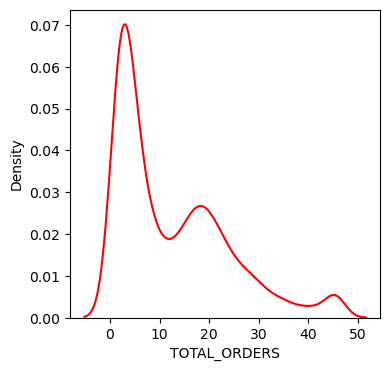

REVENUE
1.1222449930961889


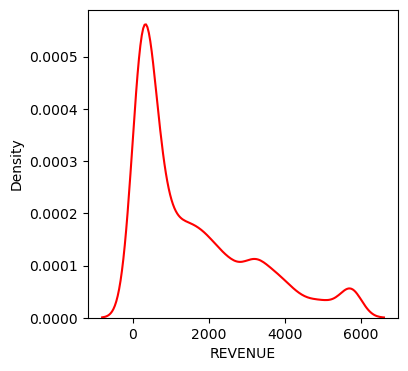

AVERAGE_ORDER_VALUE
0.9405113648413831


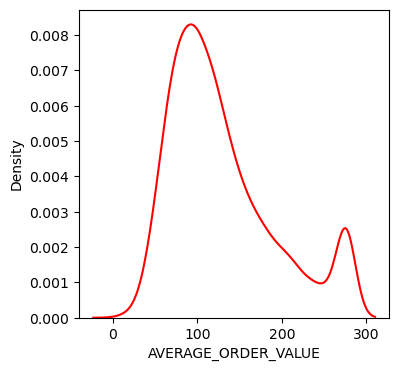

CARRIAGE_REVENUE
1.0494931910234648


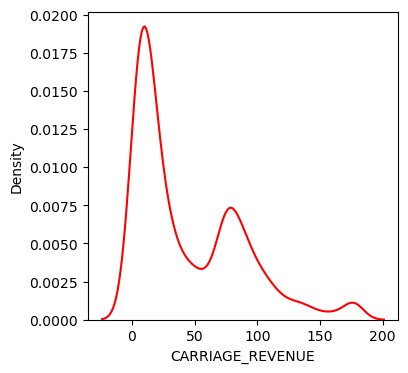

AVERAGE_SHIPPING
-0.25803136236527985


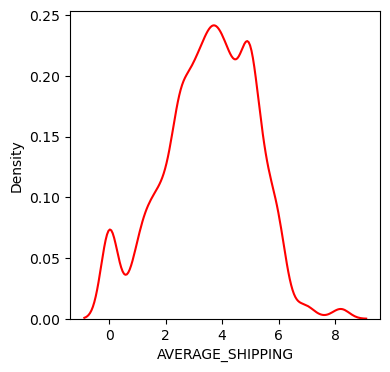

AVG_DAY_S_BETWEEN_ORDERS
1.1638458774276592


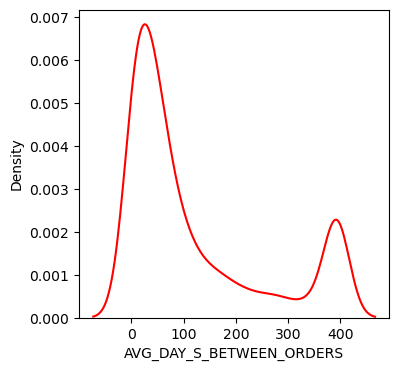

DAYS_SINCE_LASTORDER
0.38988590321021616


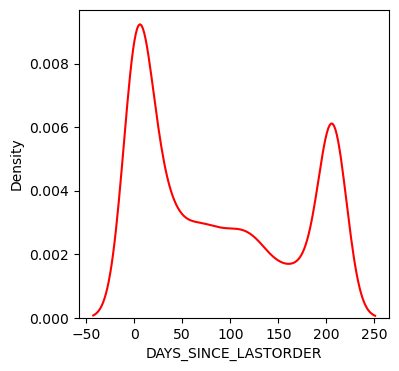

MONDAY_ORDERS
0.9504635249727015


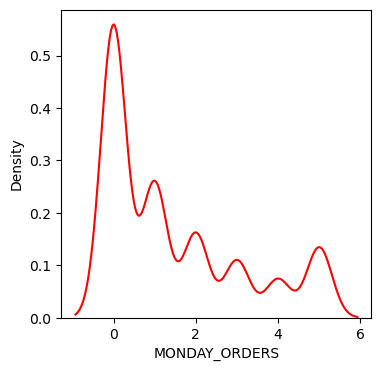

TUESDAY_ORDERS
1.3166944788475414


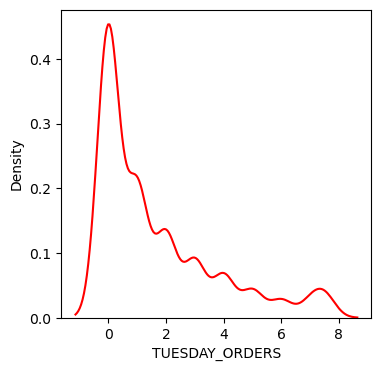

WEDNESDAY_ORDERS
1.270929929680216


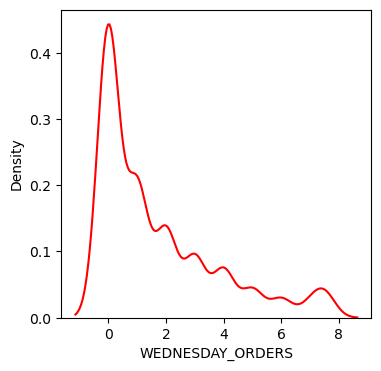

THURSDAY_ORDERS
1.1535369192046832


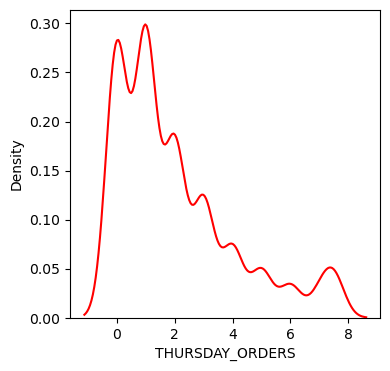

FRIDAY_ORDERS
1.2153065423813005


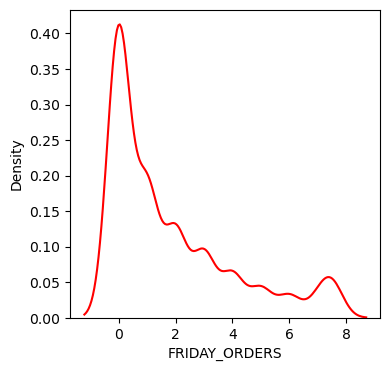

SATURDAY_ORDERS
1.3859605154629204


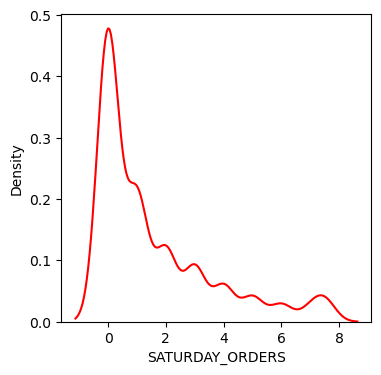

SUNDAY_ORDERS
1.24262901364763


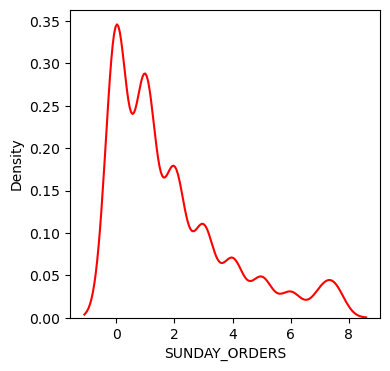

MONDAY_REVENUE
1.2130312354942407


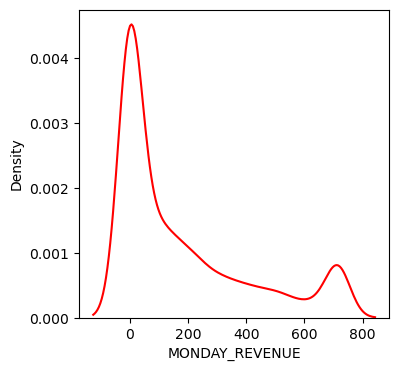

TUESDAY_REVENUE
1.218229012795118


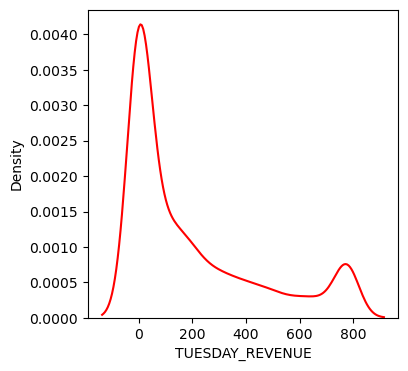

WEDNESDAY_REVENUE
1.22315246898272


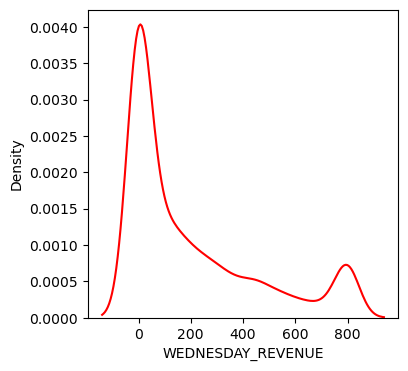

THURSDAY_REVENUE
1.2205564569965923


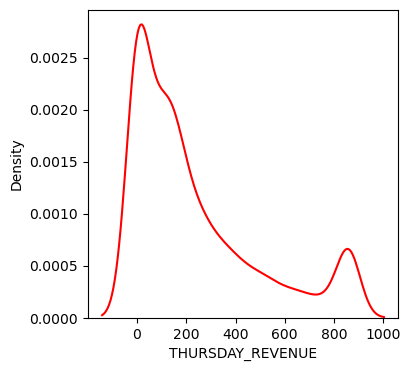

FRIDAY_REVENUE
1.2243482111200248


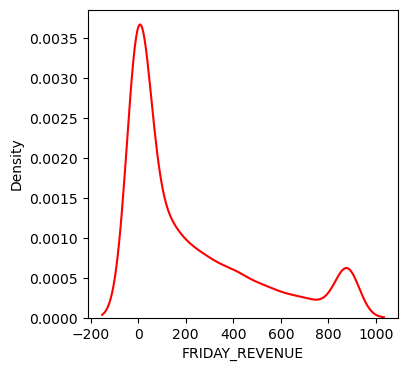

SATURDAY_REVENUE
1.24051484191917


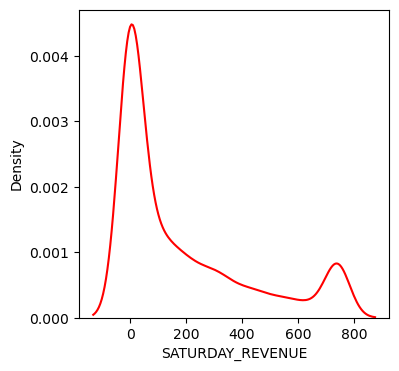

SUNDAY_REVENUE
1.1869265863964218


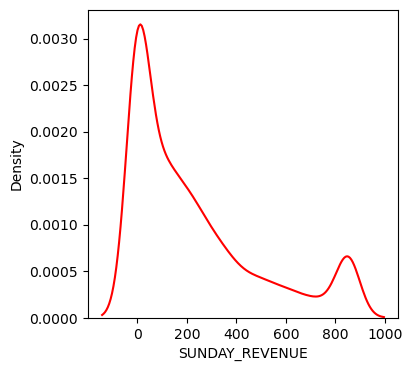

WEEK1_DAY01_DAY07_ORDERS
0.8978349468863445


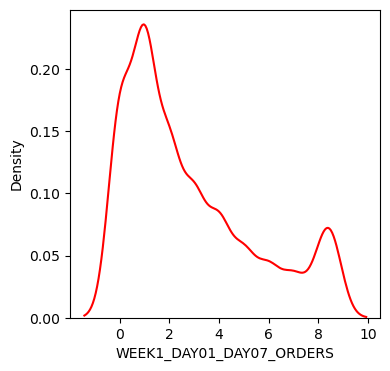

WEEK2_DAY08_DAY15_ORDERS
1.2107141183188803


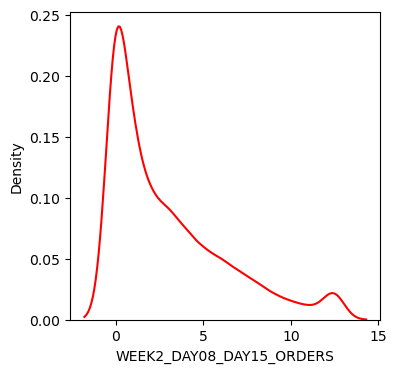

WEEK3_DAY16_DAY23_ORDERS
1.1150893319068635


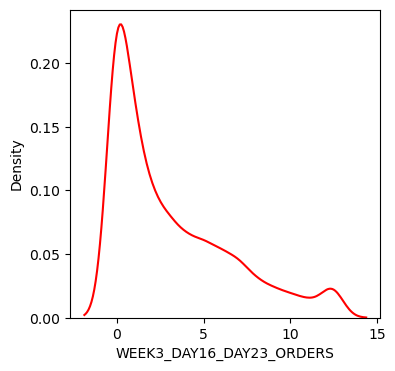

WEEK4_DAY24_DAY31_ORDERS
0.9627305574848818


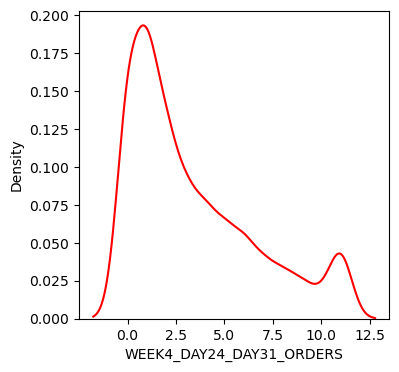

WEEK1_DAY01_DAY07_REVENUE
1.143540531182077


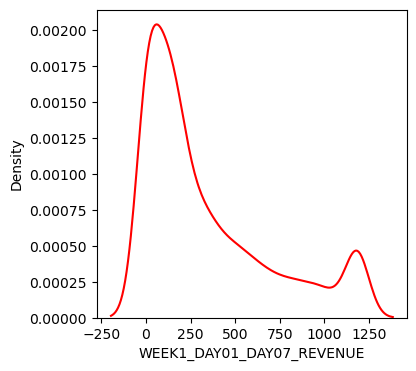

WEEK2_DAY08_DAY15_REVENUE
1.202672412734711


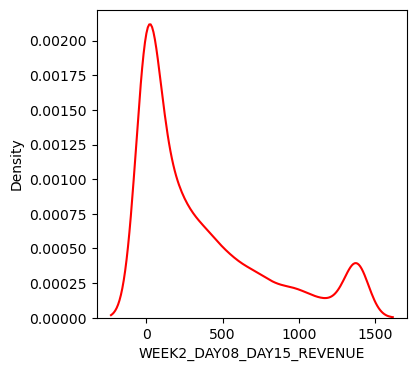

WEEK3_DAY16_DAY23_REVENUE
1.2111731851017853


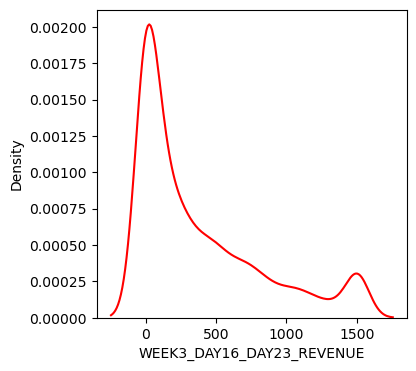

WEEK4_DAY24_DAY31_REVENUE
1.1352346886014253


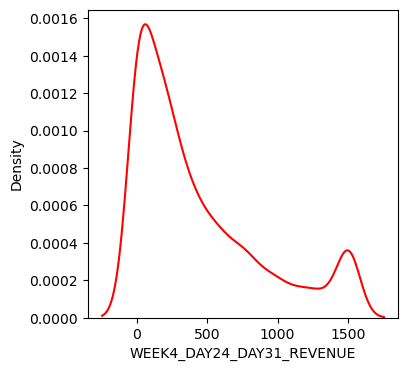

In [28]:
for i in df1:
    print(i)
    print(skew(df1[i]))
    plt.figure(figsize=(4,4))
    sns.distplot(df1[i], color='red',hist=False, kde=True)
    plt.show()

In [29]:
df1.corr()

,TOTAL_ORDERS,REVENUE,AVERAGE_ORDER_VALUE,CARRIAGE_REVENUE,AVERAGE_SHIPPING,AVG_DAY_S_BETWEEN_ORDERS,DAYS_SINCE_LASTORDER,MONDAY_ORDERS,TUESDAY_ORDERS,WEDNESDAY_ORDERS,...,SATURDAY_REVENUE,SUNDAY_REVENUE,WEEK1_DAY01_DAY07_ORDERS,WEEK2_DAY08_DAY15_ORDERS,WEEK3_DAY16_DAY23_ORDERS,WEEK4_DAY24_DAY31_ORDERS,WEEK1_DAY01_DAY07_REVENUE,WEEK2_DAY08_DAY15_REVENUE,WEEK3_DAY16_DAY23_REVENUE,WEEK4_DAY24_DAY31_REVENUE
TOTAL_ORDERS,1.000000,0.834554,-0.047686,0.889492,0.025406,-0.357493,-0.273482,0.733581,0.767696,0.766388,...,0.649657,0.550187,0.789776,0.847503,0.856004,0.837986,0.691894,0.724990,0.727110,0.708179
REVENUE,0.834554,1.000000,0.385680,0.702191,-0.041657,-0.308528,-0.237572,0.630331,0.654858,0.643182,...,0.711545,0.651627,0.644811,0.728536,0.718922,0.699076,0.780946,0.831792,0.829810,0.828712
AVERAGE_ORDER_VALUE,-0.047686,0.385680,1.000000,-0.099613,-0.107403,-0.093857,-0.077281,-0.023403,-0.017098,-0.037556,...,0.209617,0.323660,-0.086719,-0.011273,-0.030824,-0.039413,0.269412,0.282033,0.279674,0.332810
CARRIAGE_REVENUE,0.889492,0.702191,-0.099613,1.000000,0.329511,-0.363222,-0.241521,0.664822,0.683318,0.685450,...,0.553962,0.445437,0.719728,0.754182,0.769369,0.748667,0.604878,0.618533,0.625465,0.597336
AVERAGE_SHIPPING,0.025406,-0.041657,-0.107403,0.329511,1.000000,-0.115344,0.125119,0.033326,0.027844,0.029267,...,-0.024935,-0.100775,0.044813,0.024647,0.032133,0.010674,0.010417,-0.017290,-0.017893,-0.056693
AVG_DAY_S_BETWEEN_ORDERS,-0.357493,-0.308528,-0.093857,-0.363222,-0.115344,1.000000,0.055335,-0.235302,-0.250766,-0.239325,...,-0.232352,-0.243306,-0.344565,-0.279317,-0.284035,-0.309304,-0.293027,-0.238133,-0.243990,-0.280549
DAYS_SINCE_LASTORDER,-0.273482,-0.237572,-0.077281,-0.241521,0.125119,0.055335,1.000000,-0.217185,-0.213958,-0.211822,...,-0.196583,-0.325685,-0.080137,-0.253325,-0.262643,-0.303456,-0.085107,-0.220427,-0.229100,-0.272660
MONDAY_ORDERS,0.733581,0.630331,-0.023403,0.664822,0.033326,-0.235302,-0.217185,1.000000,0.531652,0.525002,...,0.416990,0.356519,0.594457,0.625175,0.644948,0.608640,0.530348,0.547142,0.559767,0.527027
TUESDAY_ORDERS,0.767696,0.654858,-0.017098,0.683318,0.027844,-0.250766,-0.213958,0.531652,1.000000,0.563613,...,0.428116,0.363731,0.596007,0.658751,0.668531,0.640068,0.542872,0.567137,0.574881,0.550350
WEDNESDAY_ORDERS,0.766388,0.643182,-0.037556,0.685450,0.029267,-0.239325,-0.211822,0.525002,0.563613,1.000000,...,0.423654,0.345094,0.596379,0.650779,0.661108,0.653107,0.522497,0.556012,0.569616,0.548409


In [30]:
df.columns

Index(['index', 'CustomerID', 'TOTAL_ORDERS', 'REVENUE', 'AVERAGE_ORDER_VALUE',
       'CARRIAGE_REVENUE', 'AVERAGE_SHIPPING', 'FIRST_ORDER_DATE',
       'LATEST_ORDER_DATE', 'AVG_DAY_S_BETWEEN_ORDERS', 'DAYS_SINCE_LASTORDER',
       'MONDAY_ORDERS', 'TUESDAY_ORDERS', 'WEDNESDAY_ORDERS',
       'THURSDAY_ORDERS', 'FRIDAY_ORDERS', 'SATURDAY_ORDERS', 'SUNDAY_ORDERS',
       'MONDAY_REVENUE', 'TUESDAY_REVENUE', 'WEDNESDAY_REVENUE',
       'THURSDAY_REVENUE', 'FRIDAY_REVENUE', 'SATURDAY_REVENUE',
       'SUNDAY_REVENUE', 'WEEK1_DAY01_DAY07_ORDERS',
       'WEEK2_DAY08_DAY15_ORDERS', 'WEEK3_DAY16_DAY23_ORDERS',
       'WEEK4_DAY24_DAY31_ORDERS', 'WEEK1_DAY01_DAY07_REVENUE',
       'WEEK2_DAY08_DAY15_REVENUE', 'WEEK3_DAY16_DAY23_REVENUE',
       'WEEK4_DAY24_DAY31_REVENUE'],
      dtype='object')

In [31]:
W1_7 = df["WEEK1_DAY01_DAY07_REVENUE"].sum()
W2_15 = df["WEEK2_DAY08_DAY15_REVENUE"].sum()
W3_23 = df["WEEK3_DAY16_DAY23_REVENUE"].sum()
W4_31 = df["WEEK4_DAY24_DAY31_REVENUE"].sum()
print(W1_7)
print(W2_15)
print(W3_23)
print(W4_31)
print("All Week Sale:-",W1_7+W2_15+W3_23+W4_31)
print("Total Revenue:-",df["REVENUE"].sum())

1893191.73
2032978.67
2109134.54
2372314.2600000002
All Week Sale:- 8407619.2
Total Revenue:- 8407619.2


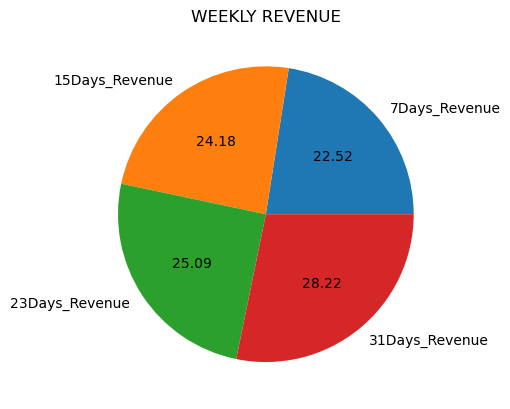

In [32]:
plt.pie(labels=["7Days_Revenue","15Days_Revenue","23Days_Revenue","31Days_Revenue"], x=[W1_7,W2_15,W3_23,W4_31],autopct="%0.2f")
plt.title("WEEKLY REVENUE")
plt.show()

In [33]:
W1_7 = df["WEEK1_DAY01_DAY07_ORDERS"].sum()
W2_15 = df["WEEK2_DAY08_DAY15_ORDERS"].sum()
W3_23 = df["WEEK3_DAY16_DAY23_ORDERS"].sum()
W4_31 = df["WEEK4_DAY24_DAY31_ORDERS"].sum()

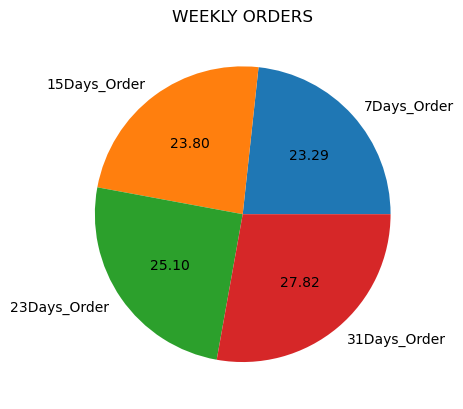

In [34]:
plt.pie(labels=["7Days_Order","15Days_Order","23Days_Order","31Days_Order"], x=[W1_7,W2_15,W3_23,W4_31], autopct="%0.2f")
plt.title("WEEKLY ORDERS")
plt.show()

In [35]:
Revenue = df['REVENUE'].sum()
print(Revenue)
Carriage_Revenue = df['CARRIAGE_REVENUE'].sum()
print(Carriage_Revenue)
Profit_revenue = Revenue - Carriage_Revenue
print(Profit_revenue)

8407619.2
230181.88
8177437.319999999


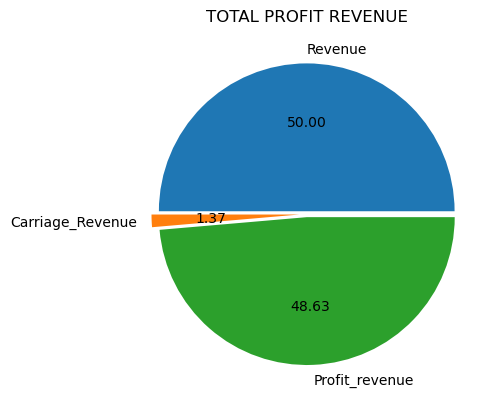

In [36]:
plt.pie(labels=['Revenue','Carriage_Revenue','Profit_revenue'], x=[Revenue,Carriage_Revenue,Profit_revenue], autopct = '%0.2f',
       explode = [0.02,0.05,0.02])
plt.title('TOTAL PROFIT REVENUE')
plt.show()